In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [215]:
banknote_data = pd.read_csv("../Datasets/banknote.csv",sep=',')

In [216]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [217]:
banknote_data= banknote_data.round()

In [218]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,4.0,9.0,-3.0,-0.0,0
1,5.0,8.0,-2.0,-1.0,0
2,4.0,-3.0,2.0,0.0,0
3,3.0,10.0,-4.0,-4.0,0
4,0.0,-4.0,5.0,-1.0,0


In [219]:
X = banknote_data.values[:,0:4]
Y = banknote_data.values[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)

In [220]:
from sklearn.neural_network import MLPClassifier

In [221]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=50)

In [222]:
mlp.fit(X_train,Y_train)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [223]:
predictions = mlp.predict(X_test)

In [224]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))

Confusion Matrix:

 [[157   6]
 [  0 112]]


Classification Report:

              precision    recall  f1-score   support

          0       1.00      0.96      0.98       163
          1       0.95      1.00      0.97       112

avg / total       0.98      0.98      0.98       275



In [225]:
print(mlp.predict_proba(X_test))

[[0.2049477  0.7950523 ]
 [0.97583988 0.02416012]
 [0.28794632 0.71205368]
 [0.96761289 0.03238711]
 [0.95785068 0.04214932]
 [0.88285324 0.11714676]
 [0.26102699 0.73897301]
 [0.96571825 0.03428175]
 [0.22990041 0.77009959]
 [0.9296403  0.0703597 ]
 [0.91064226 0.08935774]
 [0.23614773 0.76385227]
 [0.24865683 0.75134317]
 [0.95472085 0.04527915]
 [0.90702472 0.09297528]
 [0.95330911 0.04669089]
 [0.92071087 0.07928913]
 [0.982664   0.017336  ]
 [0.94662052 0.05337948]
 [0.74667268 0.25332732]
 [0.2862711  0.7137289 ]
 [0.17868782 0.82131218]
 [0.94333702 0.05666298]
 [0.36694076 0.63305924]
 [0.32293556 0.67706444]
 [0.24726449 0.75273551]
 [0.79364712 0.20635288]
 [0.27314681 0.72685319]
 [0.16016343 0.83983657]
 [0.85068665 0.14931335]
 [0.32293556 0.67706444]
 [0.9646125  0.0353875 ]
 [0.15155977 0.84844023]
 [0.97624512 0.02375488]
 [0.75758532 0.24241468]
 [0.93286098 0.06713902]
 [0.83416851 0.16583149]
 [0.14757661 0.85242339]
 [0.30797219 0.69202781]
 [0.39445125 0.60554875]


Experimenting with more iterations, more hidden layers

In [226]:
mlp = MLPClassifier(hidden_layer_sizes=(6),max_iter=100000)
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)

In [227]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Confusion Matrix:

 [[160   3]
 [  0 112]]


Classification Report:

              precision    recall  f1-score   support

          0       1.00      0.98      0.99       163
          1       0.97      1.00      0.99       112

avg / total       0.99      0.99      0.99       275

Accuracy:98.91%
Misclassified samples: 3


As we can see above, accuracy has improved.

In [228]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0
5,405,58,64,58,80,65,80,0
6,534,78,84,78,109,85,100,0
7,634,78,130,111,130,85,100,0
8,634,78,104,78,159,115,100,0
9,314,44,48,65,50,64,43,0


In [229]:
pkmn

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0
5,405,58,64,58,80,65,80,0
6,534,78,84,78,109,85,100,0
7,634,78,130,111,130,85,100,0
8,634,78,104,78,159,115,100,0
9,314,44,48,65,50,64,43,0


In [230]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
s = sb.pairplot(pkmn, hue="Legendary",height = 3,vars=["HP","Attack","Defense","Sp. Atk", "Sp. Def"],palette="husl")

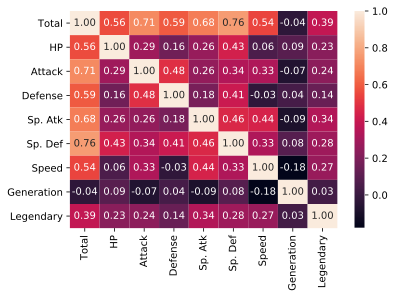

In [231]:
heat = sb.heatmap(pkmn_mlp.corr(),annot=True, fmt='.2f')

Iteration 1, loss = 16.76210277
Iteration 2, loss = 16.31721845
Iteration 3, loss = 15.84147844
Iteration 4, loss = 15.34640719
Iteration 5, loss = 14.82489347
Iteration 6, loss = 14.29013873
Iteration 7, loss = 13.74390306
Iteration 8, loss = 13.19459009
Iteration 9, loss = 12.64113407
Iteration 10, loss = 12.09327460
Iteration 11, loss = 11.55141982
Iteration 12, loss = 11.01408191
Iteration 13, loss = 10.49160017
Iteration 14, loss = 9.98331455
Iteration 15, loss = 9.49417653
Iteration 16, loss = 9.01506131
Iteration 17, loss = 8.55150866
Iteration 18, loss = 8.10594845
Iteration 19, loss = 7.67600060
Iteration 20, loss = 7.26454559
Iteration 21, loss = 6.86851544
Iteration 22, loss = 6.49120345
Iteration 23, loss = 6.12676308
Iteration 24, loss = 5.77868596
Iteration 25, loss = 5.44628198
Iteration 26, loss = 5.13034984
Iteration 27, loss = 4.82851655
Iteration 28, loss = 4.54151898
Iteration 29, loss = 4.26879129
Iteration 30, loss = 4.01278009
Iteration 31, loss = 3.76739941
Iter

Iteration 308, loss = 0.32363378
Iteration 309, loss = 0.32353351
Iteration 310, loss = 0.32343548
Iteration 311, loss = 0.32334180
Iteration 312, loss = 0.32323883
Iteration 313, loss = 0.32315486
Iteration 314, loss = 0.32304864
Iteration 315, loss = 0.32296010
Iteration 316, loss = 0.32287262
Iteration 317, loss = 0.32277003
Iteration 318, loss = 0.32267349
Iteration 319, loss = 0.32259916
Iteration 320, loss = 0.32249270
Iteration 321, loss = 0.32240005
Iteration 322, loss = 0.32232540
Iteration 323, loss = 0.32223022
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


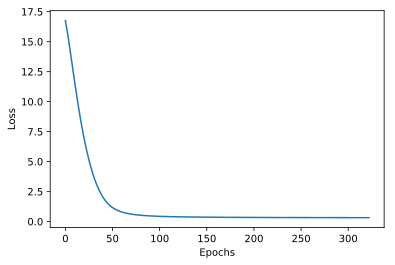

In [343]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.35, random_state = 2)
mlp = MLPClassifier(hidden_layer_sizes=(2),max_iter=1000, verbose=True, random_state=1)
mlp.fit(X_train,Y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [344]:
predictions = mlp.predict(X_test)

In [345]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Confusion Matrix:

 [[257   0]
 [ 23   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       257
          1       0.00      0.00      0.00        23

avg / total       0.84      0.92      0.88       280

Accuracy:91.79%
Misclassified samples: 23


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [346]:
print(mlp.predict_proba(X_test))

[[0.86389497 0.13610503]
 [0.89935562 0.10064438]
 [0.84512568 0.15487432]
 [0.80897647 0.19102353]
 [0.90395634 0.09604366]
 [0.84990664 0.15009336]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.82906927 0.17093073]
 [0.86672217 0.13327783]
 [0.87342473 0.12657527]
 [0.80897647 0.19102353]
 [0.85016968 0.14983032]
 [0.80994368 0.19005632]
 [0.80897647 0.19102353]
 [0.82180967 0.17819033]
 [0.83603726 0.16396274]
 [0.80897647 0.19102353]
 [0.84936062 0.15063938]
 [0.86872032 0.13127968]
 [0.85858421 0.14141579]
 [0.86516452 0.13483548]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.83467279 0.16532721]
 [0.84843061 0.15156939]
 [0.80897647 0.19102353]
 [0.81612597 0.18387403]
 [0.8847211  0.1152789 ]
 [0.84094877 0.15905123]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.80897647 0.19102353]
 [0.86904522 0.13095478]
 [0.83199103 0.16800897]
 [0.81681144 0.18318856]
 [0.84365279 0.15634721]
 [0.84091348 0.15908652]


Experimenting with Input layers, Iterations and Hidden layers

Case 1(a) - Max Input Layers, 1 Hidden Layer, 1000 Iterations

Iteration 1, loss = 0.75140186
Iteration 2, loss = 0.75002997
Iteration 3, loss = 0.74867275
Iteration 4, loss = 0.74734198
Iteration 5, loss = 0.74599288
Iteration 6, loss = 0.74462891
Iteration 7, loss = 0.74330316
Iteration 8, loss = 0.74196341
Iteration 9, loss = 0.74061362
Iteration 10, loss = 0.73926521
Iteration 11, loss = 0.73795418
Iteration 12, loss = 0.73661079
Iteration 13, loss = 0.73529670
Iteration 14, loss = 0.73397328
Iteration 15, loss = 0.73264942
Iteration 16, loss = 0.73134571
Iteration 17, loss = 0.73002447
Iteration 18, loss = 0.72871749
Iteration 19, loss = 0.72740769
Iteration 20, loss = 0.72612176
Iteration 21, loss = 0.72481227
Iteration 22, loss = 0.72352248
Iteration 23, loss = 0.72224150
Iteration 24, loss = 0.72093532
Iteration 25, loss = 0.71965928
Iteration 26, loss = 0.71838836
Iteration 27, loss = 0.71711319
Iteration 28, loss = 0.71583332
Iteration 29, loss = 0.71456613
Iteration 30, loss = 0.71331411
Iteration 31, loss = 0.71204287
Iteration 32, los

Iteration 357, loss = 0.43902004
Iteration 358, loss = 0.43850055
Iteration 359, loss = 0.43802068
Iteration 360, loss = 0.43749835
Iteration 361, loss = 0.43700566
Iteration 362, loss = 0.43651325
Iteration 363, loss = 0.43600771
Iteration 364, loss = 0.43550943
Iteration 365, loss = 0.43502568
Iteration 366, loss = 0.43453730
Iteration 367, loss = 0.43403714
Iteration 368, loss = 0.43354742
Iteration 369, loss = 0.43305699
Iteration 370, loss = 0.43257890
Iteration 371, loss = 0.43209681
Iteration 372, loss = 0.43159821
Iteration 373, loss = 0.43111416
Iteration 374, loss = 0.43062812
Iteration 375, loss = 0.43015328
Iteration 376, loss = 0.42967747
Iteration 377, loss = 0.42918782
Iteration 378, loss = 0.42870894
Iteration 379, loss = 0.42822433
Iteration 380, loss = 0.42775834
Iteration 381, loss = 0.42727809
Iteration 382, loss = 0.42681405
Iteration 383, loss = 0.42632498
Iteration 384, loss = 0.42587238
Iteration 385, loss = 0.42540026
Iteration 386, loss = 0.42493488
Iteration 

Iteration 666, loss = 0.33685534
Iteration 667, loss = 0.33665467
Iteration 668, loss = 0.33646612
Iteration 669, loss = 0.33626231
Iteration 670, loss = 0.33606918
Iteration 671, loss = 0.33587214
Iteration 672, loss = 0.33567399
Iteration 673, loss = 0.33548365
Iteration 674, loss = 0.33529720
Iteration 675, loss = 0.33509535
Iteration 676, loss = 0.33490840
Iteration 677, loss = 0.33471592
Iteration 678, loss = 0.33452483
Iteration 679, loss = 0.33433360
Iteration 680, loss = 0.33414283
Iteration 681, loss = 0.33395803
Iteration 682, loss = 0.33375736
Iteration 683, loss = 0.33357285
Iteration 684, loss = 0.33338417
Iteration 685, loss = 0.33319810
Iteration 686, loss = 0.33300923
Iteration 687, loss = 0.33282289
Iteration 688, loss = 0.33263589
Iteration 689, loss = 0.33246025
Iteration 690, loss = 0.33226831
Iteration 691, loss = 0.33208281
Iteration 692, loss = 0.33190589
Iteration 693, loss = 0.33171784
Iteration 694, loss = 0.33153507
Iteration 695, loss = 0.33135285
Iteration 

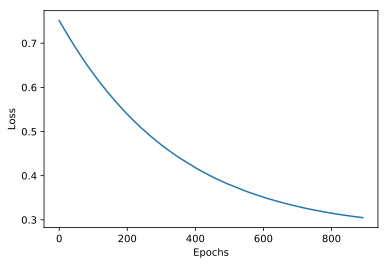

Confusion Matrix:

 [[257   0]
 [ 23   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       257
          1       0.00      0.00      0.00        23

avg / total       0.84      0.92      0.88       280

Accuracy:91.79%
Misclassified samples: 23


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [347]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.35, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(1),max_iter=1000, verbose=True, random_state=1)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 1(b) - Max Input Layers, 3 Hidden Layers, 1000 Iterations

Iteration 1, loss = 11.82022555
Iteration 2, loss = 1.86007019
Iteration 3, loss = 1.86006681
Iteration 4, loss = 1.86006287
Iteration 5, loss = 2.36784755
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


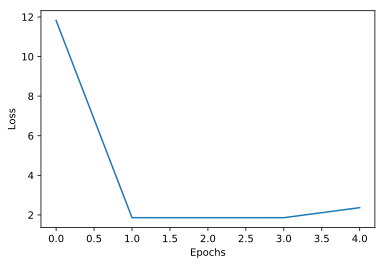

Confusion Matrix:

 [[257   0]
 [ 23   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       257
          1       0.00      0.00      0.00        23

avg / total       0.84      0.92      0.88       280

Accuracy:91.79%
Misclassified samples: 23


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [373]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.35, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(500,500,500),max_iter=1000, verbose=True, random_state=1)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 1(c) - Max Input Layers, 10 Hidden Layers, 1000 Iterations

Iteration 1, loss = 0.53954627
Iteration 2, loss = 0.53497911
Iteration 3, loss = 0.53049072
Iteration 4, loss = 0.52598310
Iteration 5, loss = 0.52155739
Iteration 6, loss = 0.51713250
Iteration 7, loss = 0.51266346
Iteration 8, loss = 0.50825286
Iteration 9, loss = 0.50389980
Iteration 10, loss = 0.49951935
Iteration 11, loss = 0.49524115
Iteration 12, loss = 0.49093364
Iteration 13, loss = 0.48665980
Iteration 14, loss = 0.48244316
Iteration 15, loss = 0.47832120
Iteration 16, loss = 0.47415160
Iteration 17, loss = 0.47006043
Iteration 18, loss = 0.46597973
Iteration 19, loss = 0.46199337
Iteration 20, loss = 0.45802741
Iteration 21, loss = 0.45408755
Iteration 22, loss = 0.45019080
Iteration 23, loss = 0.44632705
Iteration 24, loss = 0.44259311
Iteration 25, loss = 0.43876335
Iteration 26, loss = 0.43508852
Iteration 27, loss = 0.43144443
Iteration 28, loss = 0.42775793
Iteration 29, loss = 0.42422092
Iteration 30, loss = 0.42063776
Iteration 31, loss = 0.41719947
Iteration 32, los

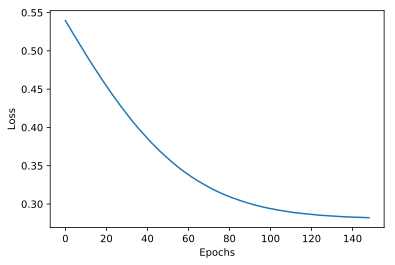

Confusion Matrix:

 [[257   0]
 [ 23   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       257
          1       0.00      0.00      0.00        23

avg / total       0.84      0.92      0.88       280

Accuracy:91.79%
Misclassified samples: 23


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [370]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.35, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(1,10),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(a) - 1 Input Layer, 4 Hidden Layers, 1000 Iterations

Case 2(b) - 3 Input Layers, 4 Hidden Layers, 1000 Iterations

Case 2(c) - 5 Input Layers, 4 Hidden Layers, 1000 Iterations

Case 3(a) - Max Input Layers, 4 Hidden Layers, 10 Iterations

Case 3(b) - Max Input Layers, 4 Hidden Layers, 100 Iterations

Case 3(c) - Max Input Layers, 4 Hidden Layers, 10000 Iterations